In [1]:
import pandas as pd
import numpy as np
import pickle

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
stops = stopwords.words('english')
countVec = CountVectorizer(stop_words=stops, lowercase=True)
tfidfVec = TfidfVectorizer(stop_words=stops, lowercase=True)

df = pd.read_csv('train.csv')
display(df)

x = df.comment_text
countX = countVec.fit_transform(x)
tfidfX = tfidfVec.fit_transform(x)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


{25: 0.487615679616638, 50: 0.6352256487853656, 75: 0.7119260319496954, 100: 0.7582362778142652, 125: 0.7867553535313292, 150: 0.8073002577197739, 175: 0.8212843942006405, 200: 0.8323627969675793, 225: 0.8410648174634303, 250: 0.8480521713331677, 275: 0.8539660889615136, 300: 0.8591228545493746, 325: 0.8637345725347702, 350: 0.8678341460330448, 375: 0.8715774037469125, 400: 0.8750068085270845, 425: 0.8781371369658463, 450: 0.8810399504854625, 475: 0.8837578244027344}


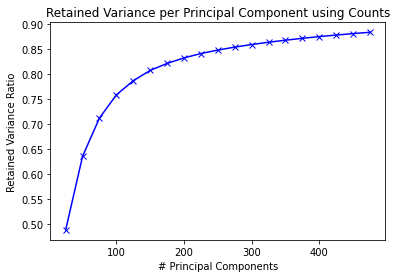

In [0]:
n_components = list(range(25,500,25))
retained_variance_ratios = []
for i in n_components:
  TSVD = TruncatedSVD(n_components=i)
  principalComponents = TSVD.fit_transform(countX)
  retained_variance_ratio = np.sum(TSVD.explained_variance_ratio_)
  retained_variance_ratios.append(retained_variance_ratio)

print(dict(zip(n_components,retained_variance_ratios)))
plt.plot(n_components, retained_variance_ratios, 'bx-') 
plt.xlabel('# Principal Components') 
plt.ylabel('Retained Variance Ratio') 
plt.title('Retained Variance per Principal Component using Counts') 
plt.show()


{25: 0.052328035234170865, 50: 0.07788518992016878, 75: 0.09806223722370218, 100: 0.11573259761405186, 125: 0.1315135360267699, 150: 0.14575027807137794, 175: 0.15882137524853307, 200: 0.1710056606646177, 225: 0.18221646194868682, 250: 0.1928711726730826, 275: 0.20282441906115245, 300: 0.21214371388944742, 325: 0.22105897816909323, 350: 0.2294857973939744, 375: 0.2375935898091864, 400: 0.24537738123807593, 425: 0.25283032253160664, 450: 0.2600326453377644, 475: 0.26696161042063304}


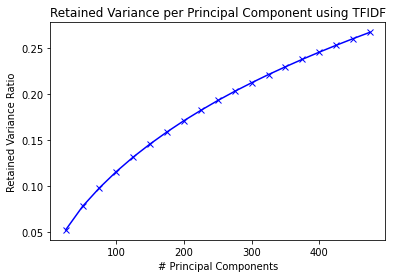

In [0]:
n_components = list(range(25,500,25))
retained_variance_ratios = []
for i in n_components:
  TSVD = TruncatedSVD(n_components=i)
  principalComponents = TSVD.fit_transform(tfidfX)
  retained_variance_ratio = np.sum(TSVD.explained_variance_ratio_)
  retained_variance_ratios.append(retained_variance_ratio)

print(dict(zip(n_components,retained_variance_ratios)))
plt.plot(n_components, retained_variance_ratios, 'bx-') 
plt.xlabel('# Principal Components') 
plt.ylabel('Retained Variance Ratio') 
plt.title('Retained Variance per Principal Component using TFIDF') 
plt.show() 

In [0]:
TSVD = TruncatedSVD(n_components=400)
principalComponents = TSVD.fit_transform(countX)


In [0]:
f=open('dim_reduced_count_vector.pickle','wb')
pickle.dump(principalComponents, f)
f.close()